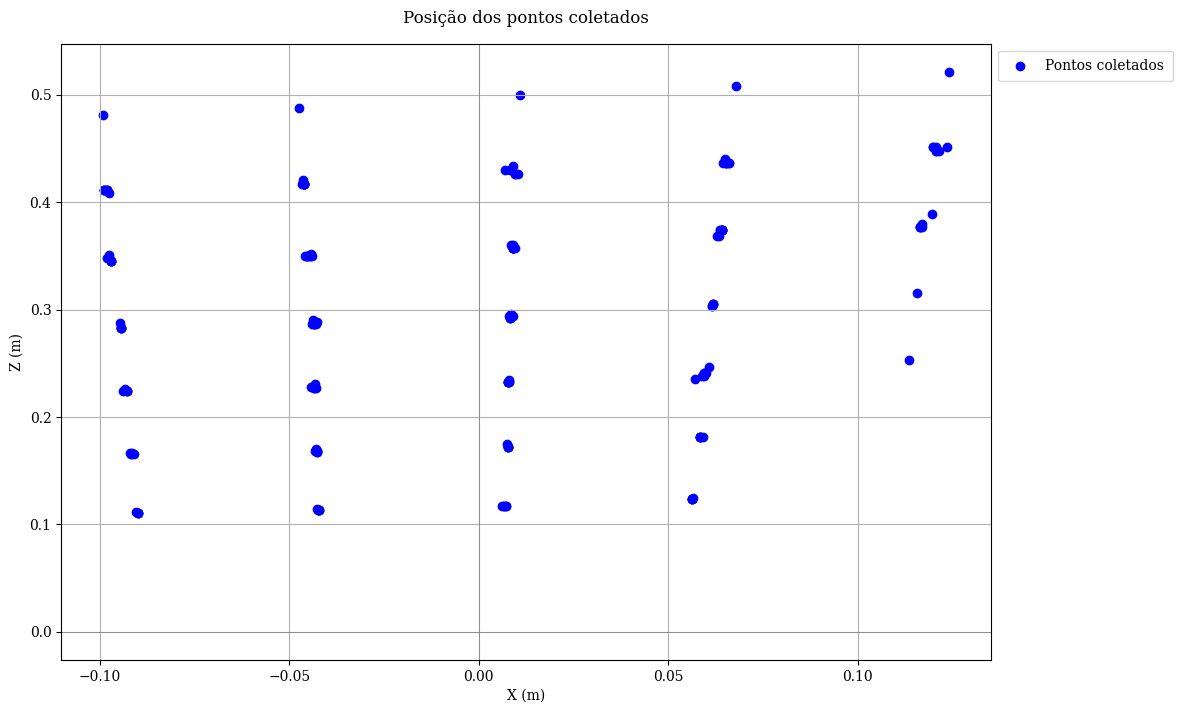

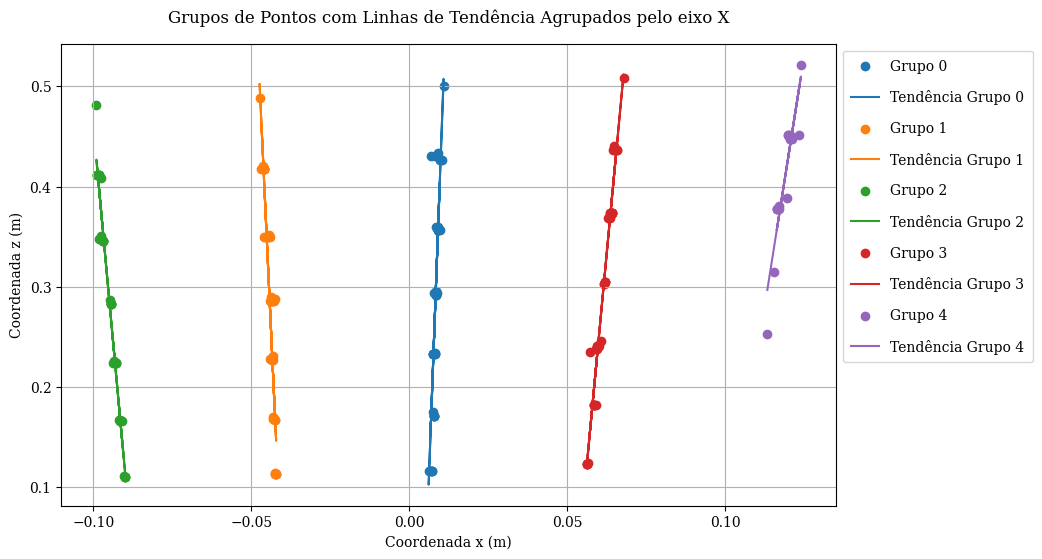

   Grupo     Média  Desvio Padrão  \
0      0  0.008305       0.000990   
1      1 -0.044065       0.001513   
2      2 -0.094801       0.003096   
3      3  0.061495       0.003270   
4      4  0.118883       0.002994   

                                      Confiança  
0  (0.007996145787437304, 0.008613042961856074)  
1   (-0.04454310443835222, -0.0435877985691401)  
2  (-0.09588113081328122, -0.09372043349983182)  
3    (0.06043476552330283, 0.06255510503407292)  
4     (0.11728814099465101, 0.1204785377929917)  


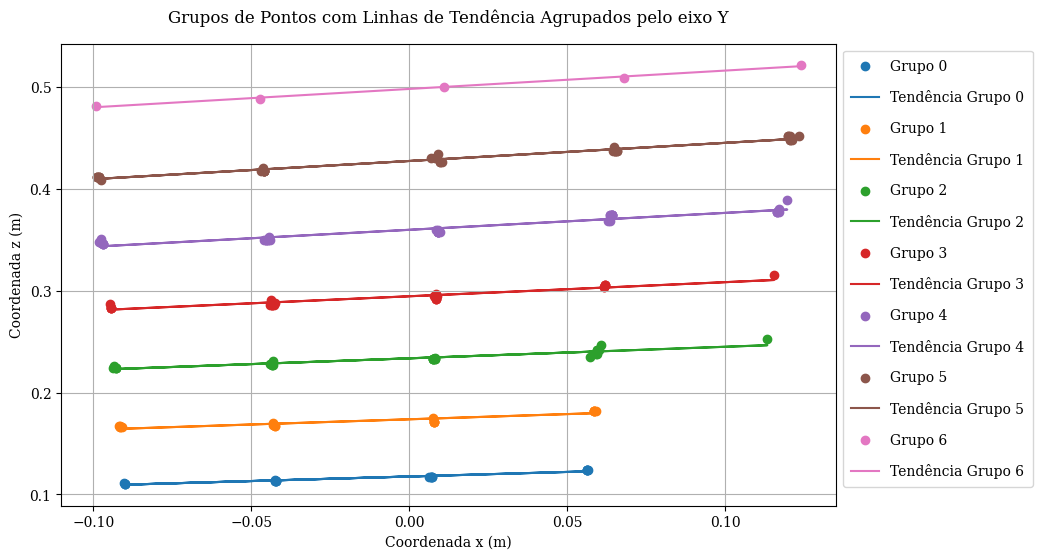

   Grupo     Média  Desvio Padrão                                   Confiança
0      0  0.116323       0.004924  (0.11401860711794894, 0.11862718278008351)
1      1  0.171889       0.006115   (0.1691051933499093, 0.17467237969175775)
2      2  0.233094       0.007428  (0.23002789759602874, 0.23616050099531713)
3      3  0.292994       0.008403   (0.28967051165074276, 0.2963184152760441)
4      4  0.360954       0.012521    (0.3568950405568659, 0.3650124591307709)
5      5  0.428617       0.014301    (0.4237048085554818, 0.4335296338284093)
6      6  0.499771       0.016048   (0.47984471581307114, 0.5196980608754918)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import pandas as pd
from scipy import stats

plt.rcParams.update({
    # 'text.usetex': True,
    # 'text.latex.preamble': r'\usepackage{amsmath}\usepackage{amssymb}',
    'font.family': 'serif',
    'savefig.bbox': 'tight',
    # 'savefig.format': 'pdf'
    # Padding para o título
    'axes.titlepad': 15,

    # Padding para as legendas
    'legend.labelspacing': 1.2,
    'legend.borderpad': 0.6
})

# Dados de entrada
data = np.array([
    [0.006779689570894481 , 0.11673397022811122],
    [-0.04210891131148234 , 0.11343404535721974],
    [-0.09037756211748457 , 0.11112496196560837],
    [0.056532141870548024 , 0.12443306465340054],
    [-0.09155861685321752 , 0.16680502134687686],
    [-0.04300719950461743 , 0.1702670549295628],
    [0.007446078165088702 , 0.17481516283428383],
    [0.05923547846251655 , 0.18175638837860963],
    [-0.09329716091439219 , 0.22593138382809563],
    [-0.04312059823991358 , 0.231067466250287],
    [0.008093833365049007 , 0.23417411038658364],
    [0.060752849997337016 , 0.2461348488652766],
    [0.11336583669874623 , 0.2527448985457418],
    [-0.09461298860934196 , 0.2871371557935536],
    [-0.043851406264598596 , 0.29027930871966123],
    [0.008451351202636386 , 0.2962580991274733],
    [0.061560007490940545 , 0.3031144423338278],
    [0.11548708734705887 , 0.3151250193382863],
    [-0.09745770013678533 , 0.35054541956224966],
    [-0.04422082186544493 , 0.3521796512570299],
    [0.009109117993259391 , 0.3597744336836309],
    [0.06348586679646387 , 0.36815513939154415],
    [0.11696547538139627 , 0.37728040502695503],
    [-0.09750932624535319 , 0.40828429327620597],
    [-0.046333484970087255 , 0.4204118568009467],
    [0.010350106199214256 , 0.4265584264168367],
    [0.06490997236678818 , 0.4403836489393229],
    [0.12060789947139418 , 0.44784514736379166],
    [-0.09900311220784826 , 0.48102652773755794],
    [-0.04734694688164488 , 0.48813298334841004],
    [0.010891112411755773 , 0.4999995540751103],
    [0.06785282719519183 , 0.5081908508803616],
    [0.12399891927208286 , 0.5215070256799679],
    [-0.08979227586577719 , 0.11041151065748336],
    [-0.08979227586577719 , 0.11041151065748336],
    [-0.08979227586577719 , 0.11041151065748336],
    [-0.04254709873268791 , 0.11415651351496328],
    [-0.04241819272630159 , 0.11343552986936159],
    [-0.04241819272630159 , 0.11343552986936159],
    [-0.04210891131148234 , 0.11343404535721974],
    [-0.04210891131148234 , 0.11343404535721974],
    [0.006779689570894481 , 0.11673397022811122],
    [0.007088014869757972 , 0.11674084501776993],
    [0.007088014869757972 , 0.11674084501776993],
    [0.006162947879542414 , 0.1167203954876625],
    [0.05635273628150795 , 0.1236664012710238],
    [0.05635273628150795 , 0.1236664012710238],
    [0.05635273628150795 , 0.1236664012710238],
    [0.05635273628150795 , 0.1236664012710238],
    [0.05846515574697143 , 0.18172797263026608],
    [0.05846515574697143 , 0.18172797263026608],
    [0.05846515574697143 , 0.18172797263026608],
    [0.05846515574697143 , 0.18172797263026608],
    [0.007738994204586605 , 0.17158311577093294],
    [0.007738994204586605 , 0.17158311577093294],
    [0.007738994204586605 , 0.17158311577093294],
    [0.007738994204586605 , 0.17158311577093294],
    [-0.04254377985965247 , 0.16710357447350488],
    [-0.04254377985965247 , 0.16710357447350488],
    [-0.04269721606987024 , 0.16815106171862199],
    [-0.04307835881992557 , 0.1681535628776888],
    [-0.04269721606987024 , 0.16815106171862199],
    [-0.091943191815176 , 0.16681341143761946],
    [-0.09084586980031722 , 0.16575569665379475],
    [-0.09161217249318916 , 0.16577229624500917],
    [-0.09161217249318916 , 0.16577229624500917],
    [-0.09290447404184395 , 0.22446677460738168],
    [-0.09290447404184395 , 0.22446677460738168],
    [-0.09382406630250721 , 0.224488330978884],
    [-0.09290447404184395 , 0.22446677460738168],
    [-0.043491171218353906 , 0.22660091879088295],
    [-0.043491171218353906 , 0.22660091879088295],
    [-0.04303337914529547 , 0.22659737842450117],
    [-0.04413508879222087 , 0.22808416179255742],
    [0.007598430679262107 , 0.23264797260140013],
    [0.00805806637507288 , 0.23265288861336164],
    [0.00805806637507288 , 0.23265288861336164],
    [0.007598430679262107 , 0.23264797260140013],
    [0.007598430679262107 , 0.23264797260140013],
    [0.007598430679262107 , 0.23264797260140013],
    [0.05949779190397659 , 0.24134633542430334],
    [0.05949779190397659 , 0.24134633542430334],
    [0.05995999894946952 , 0.24135891122999042],
    [0.05711374085436978 , 0.23511686088183642],
    [0.059441781778287704 , 0.23823837999424952],
    [0.05898352383511191 , 0.23822575132897883],
    [0.061867327619086546 , 0.3052340660846951],
    [0.061867327619086546 , 0.3052340660846951],
    [0.061560007490940545 , 0.3031144423338278],
    [0.061867327619086546 , 0.3052340660846951],
    [0.00840953247949123 , 0.2942072309981231],
    [0.008949147768499264 , 0.2942098745954815],
    [0.007869836532504369 , 0.29420467004271217],
    [0.00840953247949123 , 0.2942072309981231],
    [0.00840953247949123 , 0.2942072309981231],
    [0.00836806538942141 , 0.29217507494122563],
    [0.00836806538942141 , 0.29217507494122563],
    [0.00836806538942141 , 0.29217507494122563],
    [-0.04342734264754365 , 0.2862893652291271],
    [-0.04342734264754365 , 0.2862893652291271],
    [-0.04342734264754365 , 0.2862893652291271],
    [-0.04396327112795196 , 0.2862944600380308],
    [-0.04289147312454705 , 0.28628435596995105],
    [-0.04256149544780448 , 0.2882651558907742],
    [-0.09423880462500642 , 0.2832115793921322],
    [-0.09423880462500642 , 0.2832115793921322],
    [-0.09423880462500642 , 0.2832115793921322],
    [-0.09423880462500642 , 0.2832115793921322],
    [0.1170018301695539 , 0.3801192425366168],
    [0.1163388025277401 , 0.3772683931203554],
    [0.1163388025277401 , 0.3772683931203554],
    [0.1163388025277401 , 0.3772683931203554],
    [0.11967508058342276 , 0.3888702561988415],
    [0.06286029762322999 , 0.3681494406231985],
    [0.06420622471858899 , 0.37373087067142635],
    [0.06420622471858899 , 0.37373087067142635],
    [0.06357358699122695 , 0.37372549109620556],
    [0.06357358699122695 , 0.37372549109620556],
    [0.06420622471858899 , 0.37373087067142635],
    [0.06420622471858899 , 0.37373087067142635],
    [0.06420622471858899 , 0.37373087067142635],
    [0.008484359582292796 , 0.3597752424891034],
    [0.009680271010097653 , 0.35710206535407013],
    [0.009059074589172728 , 0.35710263984987506],
    [0.009059074589172728 , 0.35710263984987506],
    [0.009059074589172728 , 0.35710263984987506],
    [0.009059074589172728 , 0.35710263984987506],
    [0.009059074589172728 , 0.35710263984987506],
    [0.009059074589172728 , 0.35710263984987506],
    [-0.04583405313526715 , 0.34960007767711143],
    [-0.04397787942846755 , 0.3495773293346188],
    [-0.044596527690931836 , 0.3495848244963387],
    [-0.044596527690931836 , 0.3495848244963387],
    [-0.045215253323409234 , 0.34959240727455065],
    [-0.045215253323409234 , 0.34959240727455065],
    [-0.045215253323409234 , 0.34959240727455065],
    [-0.097013245044176 , 0.3454090244583033],
    [-0.097013245044176 , 0.3454090244583033],
    [-0.097013245044176 , 0.3454090244583033],
    [-0.09816715066926125 , 0.34798666406746587],
    [-0.09754531422620495 , 0.34797155404707336],
    [-0.097013245044176 , 0.3454090244583033],
    [-0.09810772056735156 , 0.411536265322317],
    [-0.09881285944566871 , 0.4115540357865527],
    [-0.09881285944566871 , 0.4115540357865527],
    [-0.09881285944566871 , 0.4115540357865527],
    [-0.09810772056735156 , 0.411536265322317],
    [-0.09810772056735156 , 0.411536265322317],
    [-0.0460465361061128 , 0.4170618668533479],
    [-0.0460465361061128 , 0.4170618668533479],
    [-0.04675344255891542 , 0.41707302181141737],
    [-0.0460465361061128 , 0.4170618668533479],
    [-0.0460465361061128 , 0.4170618668533479],
    [-0.0460465361061128 , 0.4170618668533479],
    [-0.0460465361061128 , 0.4170618668533479],
    [0.009638925547258847 , 0.4265635681047669],
    [0.009638925547258847 , 0.4265635681047669],
    [0.006834278753026157 , 0.4300373502099927],
    [0.008266463389081135 , 0.4300260054443783],
    [0.009037726079976124 , 0.4335134435455129],
    [0.06521548702512431 , 0.43682687489914995],
    [0.06521548702512431 , 0.43682687489914995],
    [0.06450155242421324 , 0.43682652745110173],
    [0.06521548702512431 , 0.43682687489914995],
    [0.06592926765175777 , 0.4368272938811604],
    [0.06592926765175777 , 0.4368272938811604],
    [0.12060789947139418 , 0.44784514736379166],
    [0.12132419813193787 , 0.4478516144744915],
    [0.12354359665147996 , 0.45153224832559125],
    [0.11993936021697799 , 0.4515011827306068],
    [0.11993936021697799 , 0.4515011827306068],
    [0.12066047910549833 , 0.4515071917174991]
])

# Criar um dataframe para facilitar a manipulação
df = pd.DataFrame(data, columns=['X', 'Y'])

x_vals = data[:, 0]
y_vals = data[:, 1]

# Plotar mapa de calor
# plt.figure(figsize=(10, 6))
# kde = sns.kdeplot(x=df['X'], y=df['Y'], cmap='viridis', fill=True)
# plt.title('Mapa de Calor dos Pontos')
# plt.xlabel('Coordenada X')
# plt.ylabel('Coordenada Y')
# plt.colorbar(kde.collections[0].colorbar)  # Adiciona a colorbar corretamente
# plt.show()

# Plotar os pontos e regiões de desvio padrão
plt.figure(figsize=(12, 8))
plt.scatter(x_vals, y_vals, color='blue', label='Pontos coletados')
plt.title('Posição dos pontos coletados')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Agrupamento usando DBSCAN
dados_x = data[:, 0].reshape(-1, 1)
clustering = DBSCAN(eps=0.03, min_samples=2).fit(dados_x)
df['Cluster'] = clustering.labels_

# Plotar grupos
plt.figure(figsize=(10, 6))
unique_clusters = np.sort(df['Cluster'].unique())
for cluster in unique_clusters:
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['X'], clustered_data['Y'], label=f'Grupo {cluster}')
    
    # Traçar linhas de tendência
    if cluster != -1:  # Ignorar ruídos
        slope, intercept, _, _, _ = stats.linregress(clustered_data['X'], clustered_data['Y'])
        plt.plot(clustered_data['X'], slope * clustered_data['X'] + intercept, label=f'Tendência Grupo {cluster}')

plt.title('Grupos de Pontos com Linhas de Tendência Agrupados pelo eixo X')
plt.xlabel('Coordenada x (m)')
plt.ylabel('Coordenada z (m)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Cálculo do desvio padrão e intervalo de confiança
summary_table = []
for cluster in unique_clusters:
    if cluster != -1:
        clustered_data = df[df['Cluster'] == cluster]
        std_x = clustered_data['X'].std()
        mean_x = clustered_data['X'].mean()
        std_y = clustered_data['Y'].std()
        conf_x = stats.t.interval(0.95, len(clustered_data['X']) - 1, loc=clustered_data['X'].mean(), scale=std_x / np.sqrt(len(clustered_data['X'])))
        conf_y = stats.t.interval(0.95, len(clustered_data['Y']) - 1, loc=clustered_data['Y'].mean(), scale=std_y / np.sqrt(len(clustered_data['Y'])))
        summary_table.append([cluster, mean_x, std_x, conf_x])

# Criar e imprimir tabela de resumo
table_df = pd.DataFrame(summary_table, columns=['Grupo', 'Média', 'Desvio Padrão', 'Confiança'])
print(table_df)


# Agrupamento usando DBSCAN
dados_y = data[:, 1].reshape(-1, 1)
clustering = DBSCAN(eps=0.015, min_samples=2).fit(dados_y)
df['Cluster'] = clustering.labels_

# Plotar grupos
plt.figure(figsize=(10, 6))
unique_clusters = df['Cluster'].unique()
for cluster in unique_clusters:
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(clustered_data['X'], clustered_data['Y'], label=f'Grupo {cluster}')
    
    # Traçar linhas de tendência
    if cluster != -1:  # Ignorar ruídos
        slope, intercept, _, _, _ = stats.linregress(clustered_data['X'], clustered_data['Y'])
        plt.plot(clustered_data['X'], slope * clustered_data['X'] + intercept, label=f'Tendência Grupo {cluster}')

plt.title('Grupos de Pontos com Linhas de Tendência Agrupados pelo eixo Y')
plt.xlabel('Coordenada x (m)')
plt.ylabel('Coordenada z (m)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Cálculo do desvio padrão e intervalo de confiança
summary_table = []
for cluster in unique_clusters:
    if cluster != -1:
        clustered_data = df[df['Cluster'] == cluster]
        std_x = clustered_data['X'].std()
        std_y = clustered_data['Y'].std()
        mean_y = clustered_data['Y'].mean()
        # conf_x = stats.t.interval(0.95, len(clustered_data['X']) - 1, loc=clustered_data['X'].mean(), scale=std_x / np.sqrt(len(clustered_data['X'])))
        conf_y = stats.t.interval(0.95, len(clustered_data['Y']) - 1, loc=clustered_data['Y'].mean(), scale=std_y / np.sqrt(len(clustered_data['Y'])))
        summary_table.append([cluster, mean_y, std_y, conf_y])

# Criar e imprimir tabela de resumo
table_df = pd.DataFrame(summary_table, columns=['Grupo', 'Média', 'Desvio Padrão', 'Confiança'])
print(table_df)
